In [1]:
# Install this Graphviz library
!pip install graphviz

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import graphviz

In [7]:
from sklearn import tree

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
!pip install dmba

  Using cached dmba-0.2.4-py3-none-any.whl.metadata (1.9 kB)
Using cached dmba-0.2.4-py3-none-any.whl (11.8 MB)


In [12]:
from dmba import classificationSummary

no display found. Using non-interactive Agg backend


In [13]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [14]:
xlsx = pd.ExcelFile('ebayAuctions.xlsx')

In [15]:
# Second sheet contains all the dataset so that we need to use the sheet_name = 1 to specify which sheet we want
ebay_df = pd.read_excel(xlsx, sheet_name = 1)

In [16]:
# Data overview
# From this information, we can see that there is no missing value
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [17]:
ebay_df.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [18]:
# Create dummy variables for the categorical predictorsd
df = pd.get_dummies(ebay_df, columns=['Category', 'Currency', 'Duration','endDay'], drop_first=False)

In [19]:
df.head()

,sellerRating,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,Duration_5,Duration_7,Duration_10,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,0.01,0.01,0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,3249,0.01,0.01,0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,3249,0.01,0.01,0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,3249,0.01,0.01,0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,3249,0.01,0.01,0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [20]:
# Checking whether this is balance data or not
# This dataset can be considered as balance dataset
df["Competitive?"].value_counts()

Competitive?
1    1066
0     906
Name: count, dtype: int64

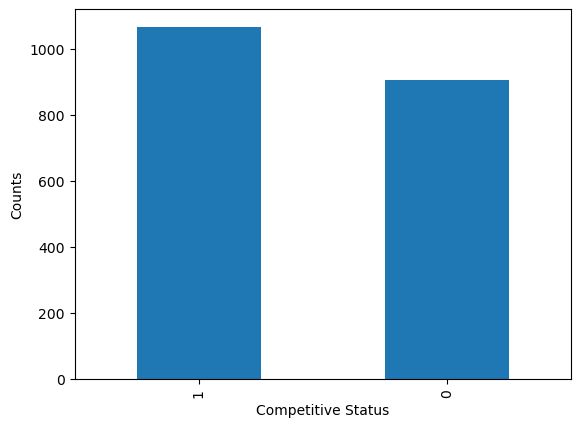

In [21]:
# Visualization
%matplotlib inline
df["Competitive?"].value_counts().plot(kind='bar')
plt.xlabel('Competitive Status')
plt.ylabel('Counts')
plt.show()

In [22]:
# Selecting the numeric predictors to do the correlation matrix
numeric_predictors = df.select_dtypes(include=['number'])
correlation_matrix = numeric_predictors.corr()
print(correlation_matrix)

              sellerRating  ClosePrice  OpenPrice  Competitive?
sellerRating      1.000000    0.000158  -0.041113     -0.033956
ClosePrice        0.000158    1.000000   0.476931      0.178458
OpenPrice        -0.041113    0.476931   1.000000     -0.096646
Competitive?     -0.033956    0.178458  -0.096646      1.000000


# Decision tree model

In [23]:
# X is all the columns except the 'Competitive' column
X = df.drop(columns=['Competitive?'])

In [24]:
# y is the 'Competitive?' column
y = df['Competitive?']

In [25]:
# Split the data into training and test datasets using a 60%:40% ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=1)

In [26]:
# Create an empty decision tree classifier model that the minimum number of records in a terminal node to 50
FirstClassTree = DecisionTreeClassifier(min_samples_leaf=50,random_state=1)

In [27]:
# Using training data to train the Decision Tree model
FirstClassTree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=1)

In [28]:
# By using the x in test dataset to predicted y
y_predicted = FirstClassTree.predict(X_test)

In [29]:
# Overview of predicted_y
y_predicted

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [30]:
# Testing the accuracy rate
FirstClassTree.score(X_test, y_test)

0.8162230671736375

In [31]:
# Testing the accuracy rate
accuracy_score(y_test, y_predicted)

0.8162230671736375

In [32]:
# Classification matrix for training dataset
classificationSummary(y_train, FirstClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.8242)

       Prediction
Actual   0   1
     0 468  85
     1 123 507


In [33]:
# Classification matrix for testing dataset
classificationSummary(y_test, FirstClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8162)

       Prediction
Actual   0   1
     0 305  48
     1  97 339


In [34]:
FirstClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [35]:
First_feature_names = list(X.columns)
First_feature_names

['sellerRating',
 'ClosePrice',
 'OpenPrice',
 'Category_Antique/Art/Craft',
 'Category_Automotive',
 'Category_Books',
 'Category_Business/Industrial',
 'Category_Clothing/Accessories',
 'Category_Coins/Stamps',
 'Category_Collectibles',
 'Category_Computer',
 'Category_Electronics',
 'Category_EverythingElse',
 'Category_Health/Beauty',
 'Category_Home/Garden',
 'Category_Jewelry',
 'Category_Music/Movie/Game',
 'Category_Photography',
 'Category_Pottery/Glass',
 'Category_SportingGoods',
 'Category_Toys/Hobbies',
 'Currency_EUR',
 'Currency_GBP',
 'Currency_US',
 'Duration_1',
 'Duration_3',
 'Duration_5',
 'Duration_7',
 'Duration_10',
 'endDay_Fri',
 'endDay_Mon',
 'endDay_Sat',
 'endDay_Sun',
 'endDay_Thu',
 'endDay_Tue',
 'endDay_Wed']

In [36]:
# This variable stores the textual representation of the decision tree 
First_test_representation = tree.export_text(FirstClassTree, feature_names = First_feature_names)
print(First_test_representation)

|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 1.03
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  1.03
|   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |--- class: 0
|   |   |   |--- OpenPrice >  2.45
|   |   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- Duration_10 <= 0.50
|   |   |   |--- class: 1
|   |   |--- Duration_10 >  0.50
|   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.97
|   |   |   |--- class: 0
|   |   |--- OpenPrice >  4.97
|   |   |   |--- ClosePrice <= 6.82
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  6.82
|   |   |   |   |--- OpenPrice <= 7.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- OpenPrice >  7.99
|   |   |   |   |   |--- class: 0
|   |--- ClosePrice >  10.00
|   |   |--- OpenPrice <= 10.97
|   |   |   |--- OpenPrice <= 9.89
|   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  9.89
|   |   |   |   |--- class: 1
|   | 

In [37]:
FirstClass_list_int = list(y.unique())
FirstClass_list_int

[0, 1]

In [38]:
Firstclass_names = list(map(str,FirstClass_list_int))
Firstclass_names

['0', '1']

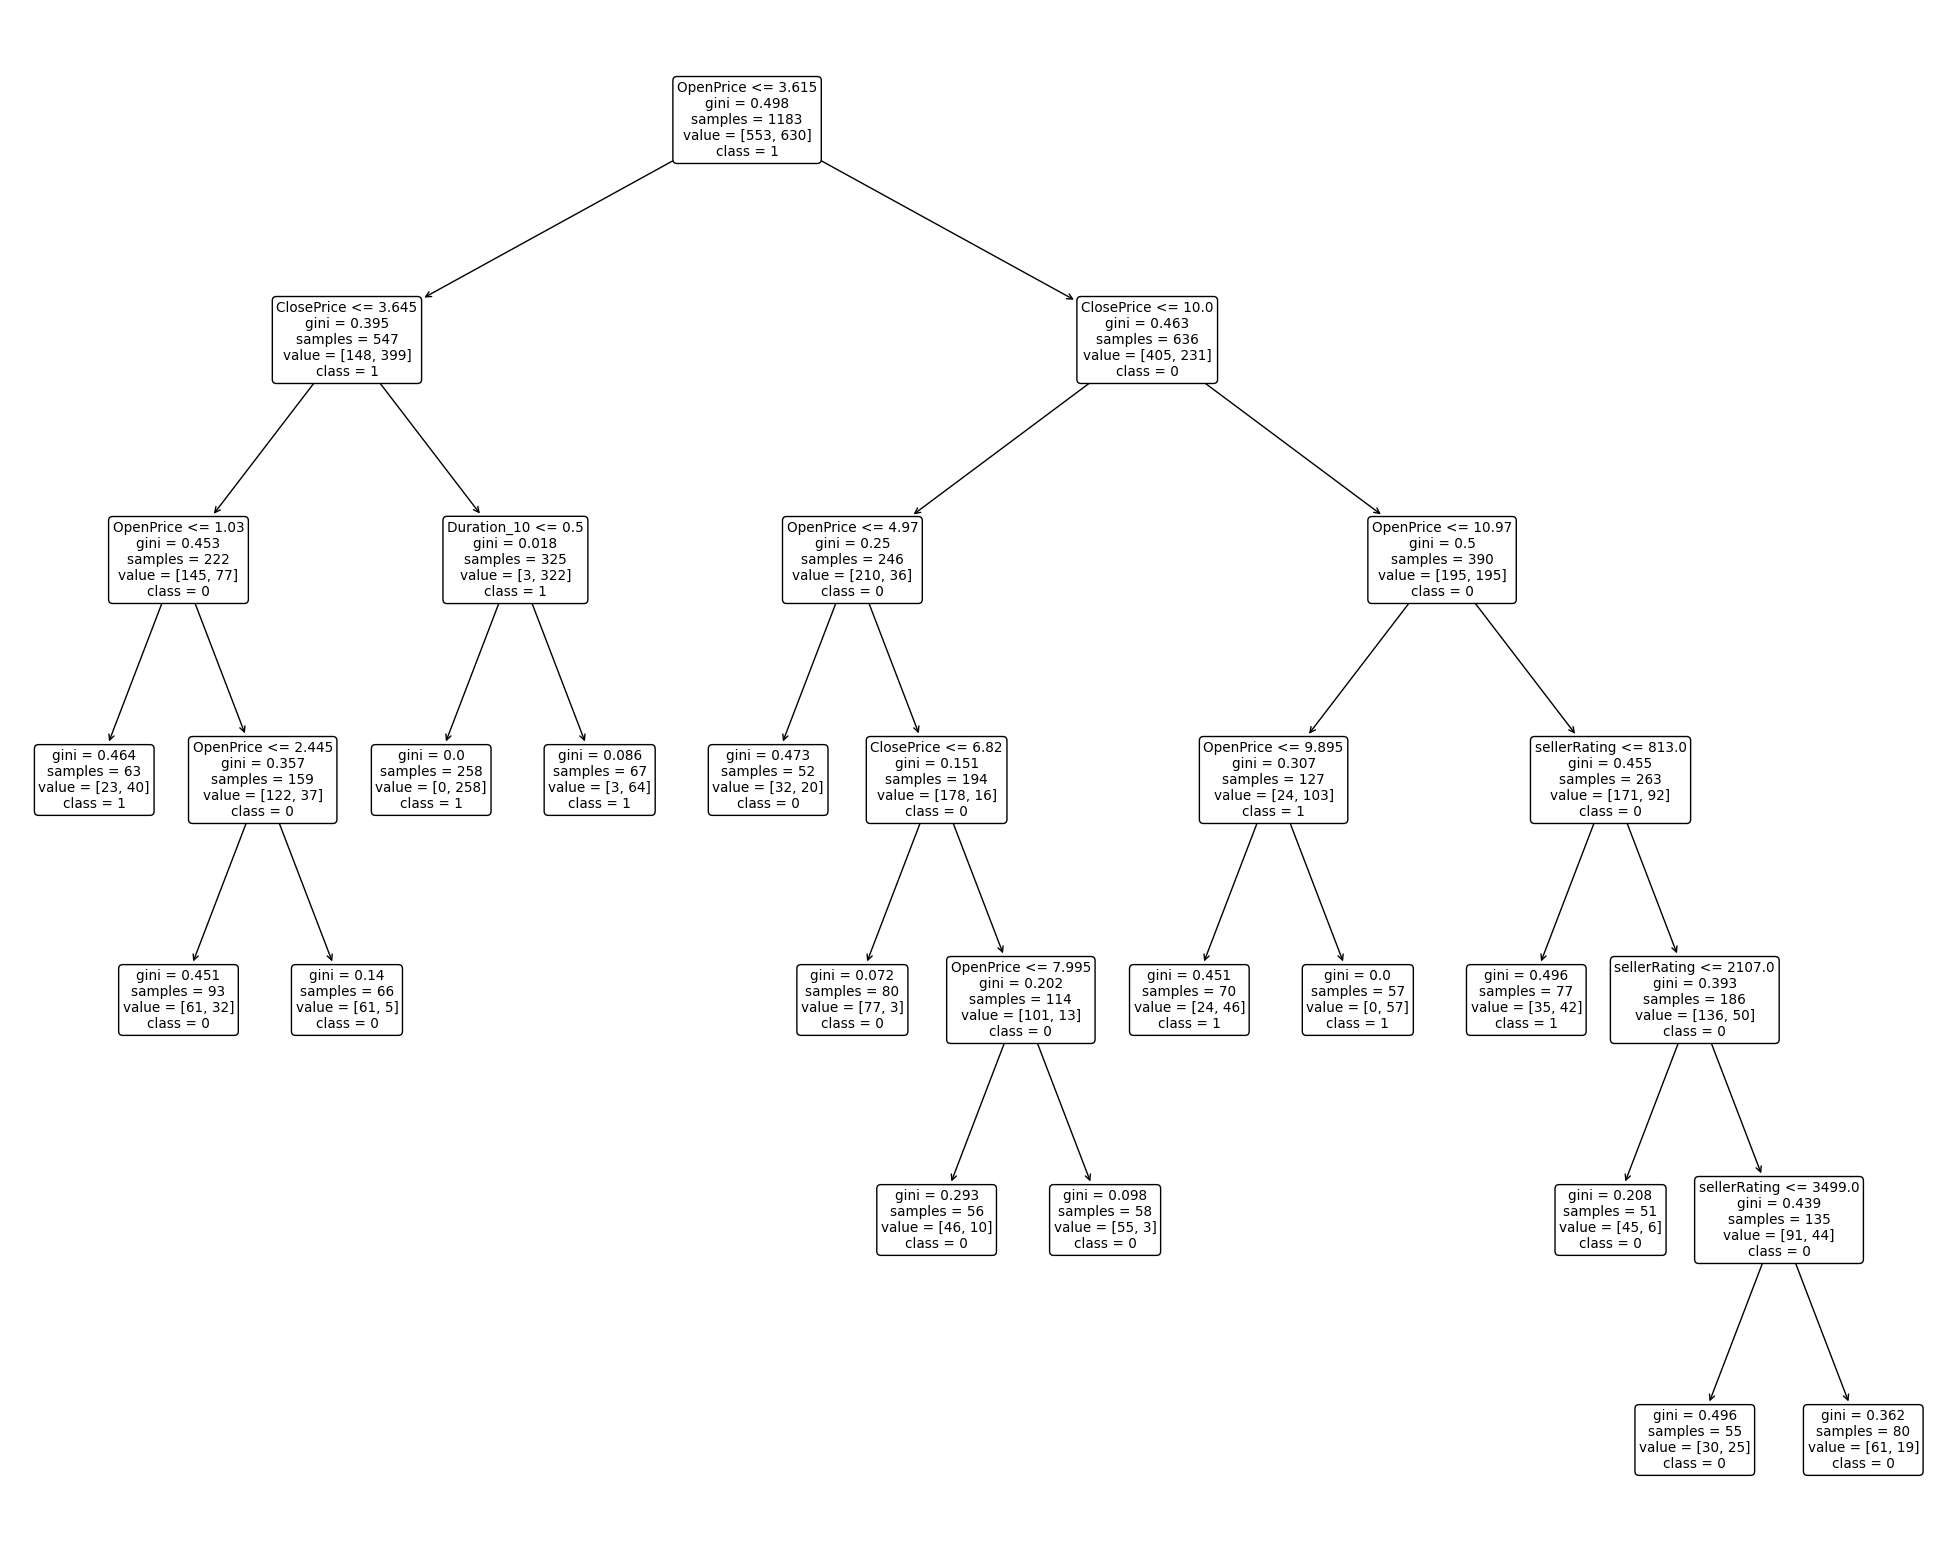

In [39]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(FirstClassTree, feature_names=First_feature_names, class_names = Firstclass_names, rounded = True)
fig.savefig('FirstClassTree.png')

# Create second decision tree

In [40]:
# read the excel file again
AUC = pd.read_excel(xlsx, 'eBay auctions')

In [41]:
# drop the column 'close price' because it is not a predictor, it is a result after the auction
AUC.drop(columns=['ClosePrice'], inplace = True)

In [42]:
# view the data again to make sure the column is dropped
AUC.head()

,Category,Currency,sellerRating,Duration,endDay,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0


In [43]:
# create dummy variables for the new data
AUC_dummy = pd.get_dummies(AUC, columns=['Category', 'Currency', 'Duration', 'endDay'])

In [44]:
# view the data with dummy variables
AUC_dummy.head()

,sellerRating,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,Duration_5,Duration_7,Duration_10,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,0.01,0,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,3249,0.01,0,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,3249,0.01,0,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,3249,0.01,0,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,3249,0.01,0,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [45]:
# X is all the columns except the 'Competitive' column
X2 = AUC_dummy.drop(columns = ['Competitive?'])

In [46]:
# y is the 'Competitive?' column
y2 = AUC_dummy['Competitive?']

In [47]:
# Split the data into training and test datasets using a 60%:40% ratio again
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=1)

In [48]:
# Create a new decision tree classifier model that the minimum number of records in a terminal node to 50
Second_ClassTree = DecisionTreeClassifier(min_samples_leaf=50, random_state=1)

In [49]:
# Using training data to train the Decision Tree model
Second_ClassTree.fit(X_train2, y_train2)

DecisionTreeClassifier(min_samples_leaf=50, random_state=1)

In [50]:
# predicted y using our decision tree
y_predicted2 = Second_ClassTree.predict(X_test2)

In [51]:
# calculate the testing accuracy
Second_ClassTree.score(X_test2, y_test2)

0.7249683143219265

In [52]:
# calculate the testing accuracy
accuracy_score(y_test2, y_predicted2)

0.7249683143219265

In [53]:
# create the confusion matrix for tests
classificationSummary(y_test2, Second_ClassTree.predict(X_test2))

Confusion Matrix (Accuracy 0.7250)

       Prediction
Actual   0   1
     0 261  92
     1 125 311


In [54]:
# import seaborn to graph the scatter plot
import seaborn as sns

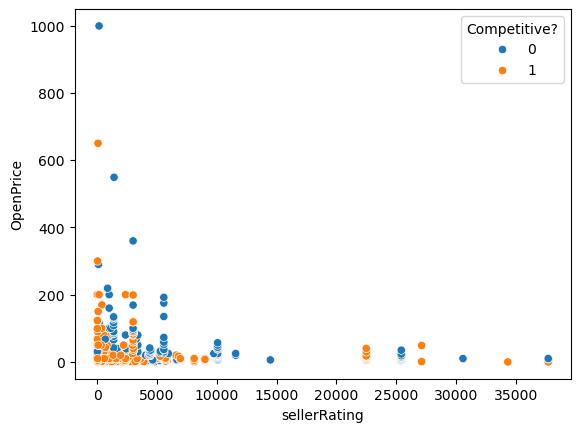

In [55]:
# create the scatter plot about sellerRating and OpenPrice
sns.scatterplot(x = "sellerRating", y = "OpenPrice", hue = "Competitive?", data = AUC)
plt.show()

In [56]:
# create a resized scatter plot to better view the data
X_resized = np.log10(np.where(AUC_dummy['sellerRating'] == 0, np.nan, AUC_dummy['sellerRating']))
Y_resized = np.log10(np.where(AUC_dummy['OpenPrice'] == 0, np.nan, AUC_dummy['OpenPrice']))
resized = {'log_sellerRating':X_resized, 'log_Openprice':Y_resized, 'Competitive?': AUC_dummy['Competitive?']}
df_resized = pd.DataFrame(data = resized)

<Axes: xlabel='log_sellerRating', ylabel='log_Openprice'>

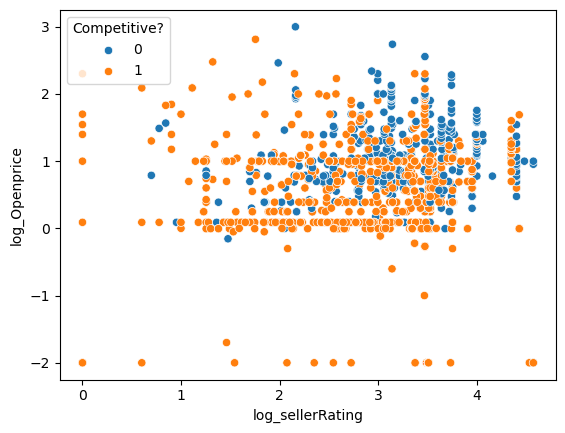

In [57]:
# show the scatter plot
sns.scatterplot(x = "log_sellerRating", y = "log_Openprice", hue = "Competitive?", data = df_resized)

In [58]:
Second_ClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [59]:
# view all feature names
Second_feature_names = list(X2.columns)
Second_feature_names

['sellerRating',
 'OpenPrice',
 'Category_Antique/Art/Craft',
 'Category_Automotive',
 'Category_Books',
 'Category_Business/Industrial',
 'Category_Clothing/Accessories',
 'Category_Coins/Stamps',
 'Category_Collectibles',
 'Category_Computer',
 'Category_Electronics',
 'Category_EverythingElse',
 'Category_Health/Beauty',
 'Category_Home/Garden',
 'Category_Jewelry',
 'Category_Music/Movie/Game',
 'Category_Photography',
 'Category_Pottery/Glass',
 'Category_SportingGoods',
 'Category_Toys/Hobbies',
 'Currency_EUR',
 'Currency_GBP',
 'Currency_US',
 'Duration_1',
 'Duration_3',
 'Duration_5',
 'Duration_7',
 'Duration_10',
 'endDay_Fri',
 'endDay_Mon',
 'endDay_Sat',
 'endDay_Sun',
 'endDay_Thu',
 'endDay_Tue',
 'endDay_Wed']

In [60]:
FirstClass_list_int = list(y2.unique())
FirstClass_list_int

[0, 1]

In [61]:
# create the second decision tree
text_representation = tree.export_text(Second_ClassTree, feature_names = feature_names)
print(text_representation)

|--- OpenPrice <= 3.62
|   |--- OpenPrice <= 1.04
|   |   |--- sellerRating <= 3138.50
|   |   |   |--- class: 1
|   |   |--- sellerRating >  3138.50
|   |   |   |--- class: 1
|   |--- OpenPrice >  1.04
|   |   |--- sellerRating <= 2365.50
|   |   |   |--- Currency_EUR <= 0.50
|   |   |   |   |--- sellerRating <= 2058.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sellerRating >  2058.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Currency_EUR >  0.50
|   |   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |   |--- sellerRating <= 522.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sellerRating >  522.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- OpenPrice >  2.45
|   |   |   |   |   |--- class: 1
|   |   |--- sellerRating >  2365.50
|   |   |   |--- class: 0
|--- OpenPrice >  3.62
|   |--- sellerRating <= 601.50
|   |   |--- sellerRating <= 128.00
|   |   |   |--- class: 1
|   |   |--- sellerRating >  128.00
|   |   |   |--- class: 1


In [62]:
# define the class names
Second_class_names = list(map(str, list_int))
Second_class_names

['0', '1']

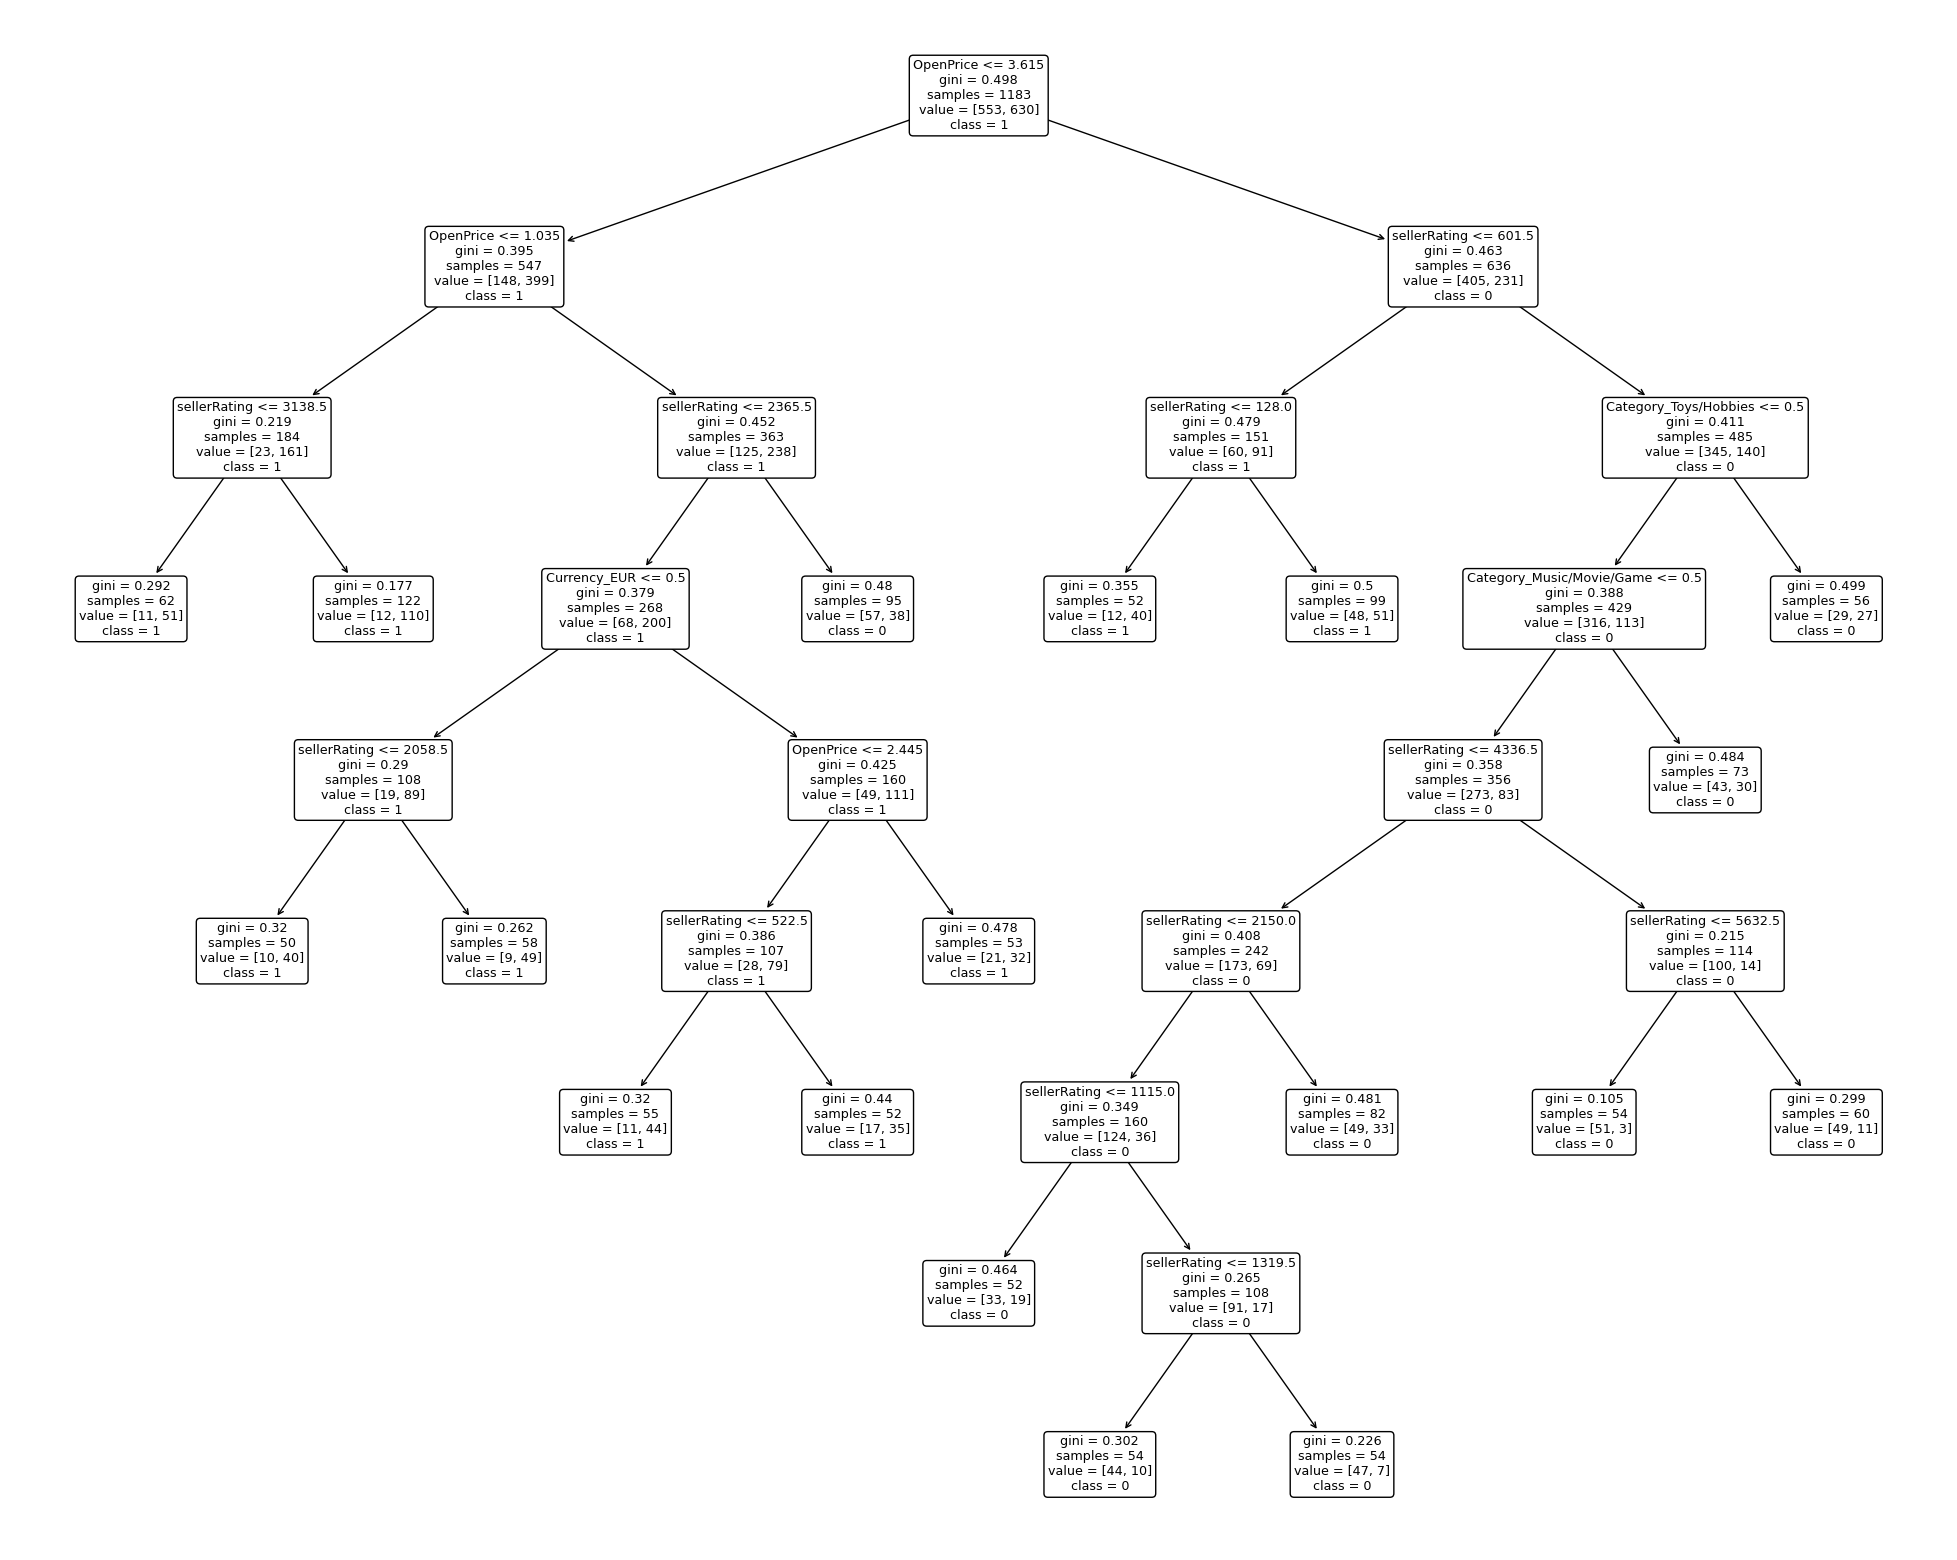

In [63]:
# export the new tree
fig2 = plt.figure(figsize=(25,20))
tree.plot_tree(Second_ClassTree, feature_names=Second_feature_names, class_names = Second_class_names, rounded = True)
fig2.savefig('SecondClassTree.png')